In [9]:
!pip install schemdraw
from schemdraw.parsing import logicparse

In [10]:
"""Elementary Operations"""
def AND(a, b):  return a * b
def OR(a, b):   return 1 if a + b else 0
def NOT(a):     return 1 - a
def NAND(a, b): return NOT(AND(a, b))

In [11]:
"""AON-CIRC Programs"""

def EQ(a, b):
  t1 = NOT(a)
  t2 = NOT(b)
  t3 = AND(t1, t2)
  t4 = AND(a, b)
  return OR(t3, t4)

def GT(a, b):
  t1 = NOT(b)
  return AND(a, t1)

def LT(a, b):
  t1 = NOT(a)
  return AND(t1, b)

def GTE(a, b):
  t1 = NOT(b)
  return OR(a, t1)

def LTE(a, b):
  t1 = NOT(a)
  return OR(t1, b)

In [12]:
"""OUTPUTS"""
F = [EQ, GT, LT, GTE, LTE]
T = ["EQ", "GT", "LT", "GTE", "LTE"]
for i, (f, t) in enumerate(zip(F, T)):
  print([t + "(" + str(a) + ", " + str(b) + ") = " + str(True if f(a, b) else False) for a in [0, 1] for b in [0, 1]])


['EQ(0, 0) = True', 'EQ(0, 1) = False', 'EQ(1, 0) = False', 'EQ(1, 1) = True']
['GT(0, 0) = False', 'GT(0, 1) = False', 'GT(1, 0) = True', 'GT(1, 1) = False']
['LT(0, 0) = False', 'LT(0, 1) = True', 'LT(1, 0) = False', 'LT(1, 1) = False']
['GTE(0, 0) = True', 'GTE(0, 1) = False', 'GTE(1, 0) = True', 'GTE(1, 1) = True']
['LTE(0, 0) = True', 'LTE(0, 1) = True', 'LTE(1, 0) = False', 'LTE(1, 1) = True']


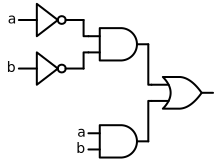

In [13]:
t1 = "(not a and not b) or (a and b)"
logicparse(t1, gateH=1.5) # EQ(a, b)

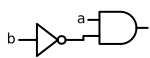

In [14]:
logicparse("a and not b") # GT(a, b)

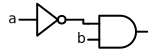

In [15]:
logicparse("not a and b") # LT(a, b)

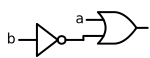

In [16]:
logicparse("a or not b") # GTE(a, b)

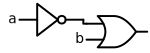

In [17]:
logicparse("not a or b") # LTE(a, b)

In [18]:
"""NAND-CIRC Programs"""
def EQ(a, b):
  t1 = NAND(a, a)
  t2 = NAND(b, b)
  t3 = NAND(t1, t2) # OR(a, b)
  t4 = NAND(a, b)
  t5 = NAND(t3, t4)
  t6 = NAND(t5, t5) # XOR(a, b)
  return NAND(t6, t6) # NOT(XOR(a, b))

def GT(a, b):
  t1 = NAND(b, b) # NOT(b)
  t2 = NAND(a, t1)
  return NAND(t2, t2)

def LT(a, b):
  t1 = NAND(a, a) # NOT(a)
  t2 = NAND(t1, b)
  return NAND(t2, t2)

def GTE(a, b):
  t1 = NAND(b, b) # NOT(b)
  t2 = NAND(a, a)
  t3 = NAND(t1, t1)
  return NAND(t2, t3)

def LTE(a, b):
  t1 = NAND(a, a) # NOT(a)
  t2 = NAND(t1, t1)
  t3 = NAND(b, b)
  return NAND(t2, t3)

In [19]:
"""OUTPUTS"""
F = [EQ, GT, LT, GTE, LTE]
T = ["EQ", "GT", "LT", "GTE", "LTE"]
for i, (f, t) in enumerate(zip(F, T)):
  print([t + "(" + str(a) + ", " + str(b) + ") = " + str(True if f(a, b) else False) for a in [0, 1] for b in [0, 1]])

['EQ(0, 0) = True', 'EQ(0, 1) = False', 'EQ(1, 0) = False', 'EQ(1, 1) = True']
['GT(0, 0) = False', 'GT(0, 1) = False', 'GT(1, 0) = True', 'GT(1, 1) = False']
['LT(0, 0) = False', 'LT(0, 1) = True', 'LT(1, 0) = False', 'LT(1, 1) = False']
['GTE(0, 0) = True', 'GTE(0, 1) = False', 'GTE(1, 0) = True', 'GTE(1, 1) = True']
['LTE(0, 0) = True', 'LTE(0, 1) = True', 'LTE(1, 0) = False', 'LTE(1, 1) = True']


In [ ]:
# EQ(a, b)

t1 = "(a nand a)"
t2 = "(b nand b)"
t3 = "(" + t1 + " nand " + t2 + ")"
t4 = "(a nand b)"
t5 = "(" + t3 + " nand " + t4 + ")"
t6 = "(" + t5 + " nand " + t5 + ")"
result = "(" + t6 + " nand " + t6 + ")"
logicparse(result)

In [ ]:
# GT(a, b)

t1 = "(b nand b)"
t2 = "(a nand" + t1 + ")"
result = t2 + "nand" + t2
logicparse(result)

In [ ]:
# LT(a, b)
t1 = "(a nand a)"
t2 = "(" + t1 + "nand b)"
result = t2 + "nand" + t2
logicparse(result)

In [ ]:
# GTE(a, b)

t1 = "(b nand b)"
t2 = "(a nand a)"
t3 = "(" + t1 + "nand" + t1 + ")"
result = t2 + "nand" + t3
logicparse(result)

In [ ]:
# LTE(a, b)

t1 = "(a nand a)"
t2 = "(" + t1 + "nand" + t1 + ")"
t3 = "(b nand b)"
result = t2 + "nand" + t3
logicparse(result)

# EXERCISE 3.9 - LOOKUP(a, b, c)
Prove that { LOOKUP, 0, 1 } is a universal set of gates where 0 and 1 are the constant functions and LOOKUP: {0, 1}^3 --> { 0, 1 } satisfies LOOKUP(a, b, c) equals a if c = 0 and equals b if c = 1

---
1. {ZERO, ONE, LOOKUP1} is Universal (Can it implement NAND?)
2. Since NAND(a, b) ~= NOT(AND(a, b))
    a. NOT(a)    = LOOKUP1(1, 0, a)  # a ? 0 : 1
    b. AND(a, b) = LOOKUP1(0, b, a)  # a ? b : 0
3. Thus, (1, 0, LOOKUP1(0, b, a)) ~= NAND(a, b)